# New Mexico Oil and Gas Field Spill Incidents Inferential Statistics Analysis

The New Mexico oil and gas field spills data collected by Oil Conversation Division (https://wwwapps.emnrd.state.nm.us/ocd/ocdpermitting/Data/Spills/Spills.aspx) is used to study the correlations among causes, impacts, locations and operators of incidents. This document is submitted to my GitHub account together with file "Capstone_project1_inferential_statistics.pdf".

In [ ]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

## Data Import and Wrangling

Import the table of spills containing oil and gas field spills data in New Mexico, and the columns are going to be analyzed are: 
+ Incident Number: incident identifier
+ Facility: facility identifier if the incident happened in a facility
+ API: well identifier if the incident happened in a well
+ Operator Name
+ Severity
+ Incident Type
+ Incident Date
+ Material Spilled
+ Volume Spilled
+ Volume Recovered
+ Spill Cause
+ Spill Source
+ District
+ County
+ Waterway Affected
+ Ground Water Impact

Forward and backward fill the NaNs in the table with the information of the same incident, drop duplicated rows, and convert the incident date as pandas datetime and set it as the index of the table.

In [25]:
# import spills.csv and fill NaNs for rows having the same incident number, drop duplicates 
spills = pd.read_csv('spills.csv')
spills = spills.groupby('Incident Number').ffill().groupby('Incident Number').bfill()
spills = spills.drop_duplicates()
# conver the incident date to be datetime, and set it as the index of the table 
spills['Incident Date'] = pd.to_datetime(spills['Incident Date'])
spills.index = spills['Incident Date']

## Exploratory Data Analysis

This section will study the corrolations among the monthly number of incidents, volume spilled and recovered, severity, incident type, material spilled, cause, source, waterway and ground water impacted, location distribution, and operators.


The monthly number of incidents plot shows the incidents since 1980s. There are more major incidents in the history. The monthly number of incidents is stable around 20/month from 1986 to 1995, goes down to below 10/month from 1996 to 1998, goes up to around 20/month in 1999, then goes down to below 10/month in 2000, after that it keeps increasing to around 60/month in 2018.  

The volume spilled in minor incidents is below 50 barrels with few exceptions, and the volume spilled in major incidents ranges widely up to 100,000 barrels. The volume recovered is less or equal to the volume spilled with few exceptions.

In [5]:
# group the major and minor incident monthly
spills_major = spills[spills['Severity']=='Major'].resample('M')['Severity'].count().reset_index()
spills_major = spills_major.rename(columns={'Severity':'Incident Number'})
spills_major['Severity'] = 'Major'
spills_minor = spills[spills['Severity']=='Minor'].resample('M')['Severity'].count().reset_index()
spills_minor = spills_minor.rename(columns={'Severity':'Incident Number'})
spills_minor['Severity'] = 'Minor'
spills_major_minor = spills_major.append(spills_minor)

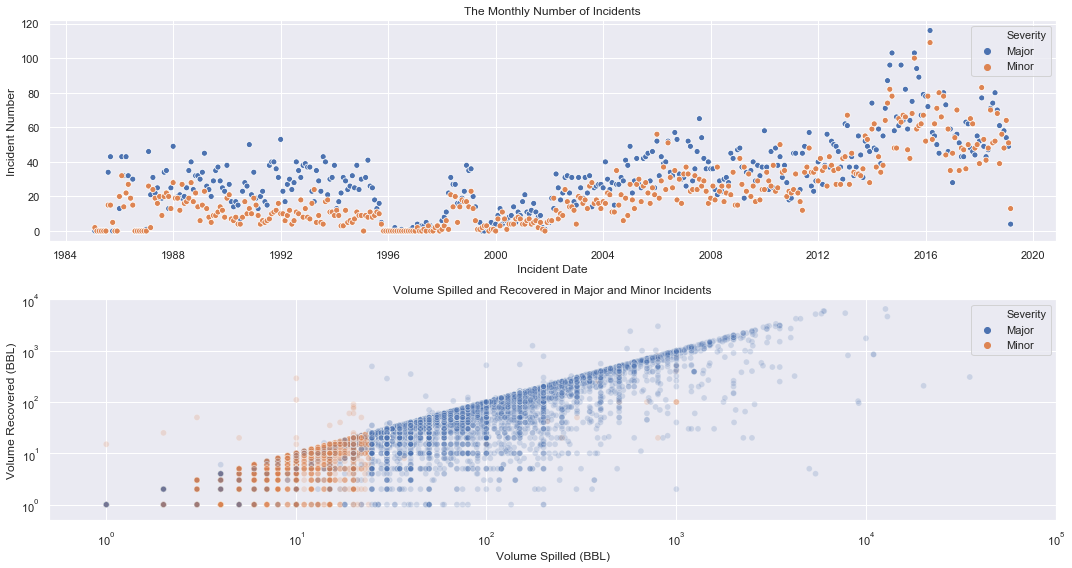

In [45]:
# plot the monthly number of incidents and spilled volume of incidents
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 8))
ax[0] = sns.scatterplot(x='Incident Date', y='Incident Number', hue='Severity', data=spills_major_minor[spills_major_minor['Incident Date']>pd.to_datetime(str(19850101))], ax=ax[0])
ax[0].set_title('The Monthly Number of Incidents')

ax[1] = sns.scatterplot(x='Volume Spilled', y='Volume Recovered',hue='Severity',hue_order=['Major','Minor'], data=spills, alpha=0.2, ax=ax[1])
ax[1].set_xlim([0.5,1e5])
ax[1].set_ylim([0.5,1e4])
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Volume Spilled (BBL)')
ax[1].set_ylabel('Volume Recovered (BBL)')
ax[1].set_title('Volume Spilled and Recovered in Major and Minor Incidents')
plt.tight_layout()

The corrolation between monthly major and minor incidents indicates a positive linearly relationship between major and minor incidents. To reduce the number of incidents, we should try to avoid both of them.

Text(0.5, 1.0, 'The Correlation between Monthly Major and Minor Incidents')

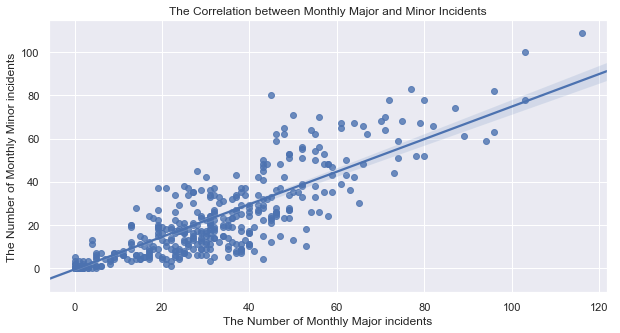

In [49]:
# plot the correlation of monthly major and minor incidents
spills_major_minor_merge = spills_major.drop('Severity',axis=1).rename(columns={'Incident Number':'Major'}).merge(spills_minor.drop('Severity',axis=1).rename(columns={'Incident Number':'Minor'}),how='outer').fillna(0)
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.regplot(spills_major_minor_merge['Major'],spills_major_minor_merge['Minor'])
ax.set_xlabel('The Number of Monthly Major incidents')
ax.set_ylabel('The Number of Monthly Minor incidents')
ax.set_title('The Correlation between Monthly Major and Minor Incidents')

The following plots indicate the correlation between the number of major and minor incidents and incident type, material spilled, spill cause and spill source. The top three incident types are produced water release, oil release and natrual gas release which is corresponding to the top three spilled materials; The top three spill causes are equipment failure, corrosion and human error; and the top three spilled sources are tank (any), flow line - production, and pipelne (any). We need to pay special attention to fire, triethylene and sulphuric acid spill, and generator, since they are related to major incident only.

The relationship between major and minor incident and ground water impact and waterway affected, indicate that ground water is more likely impacted by major incidents, and the waterway are 100% affected by major incidents. There is a loose correlation (0.7%) between ground water impact and waterway affected.

In [8]:
# major and minor incidents distribution in incident type, spilled material, spilled cause, spilled source, groud water impact and waterway affected
incident_type = spills.groupby(['Incident Type','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
spill_material = spills.groupby(['Material Spilled','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
spill_cause = spills.groupby(['Spill Cause','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
spill_source = spills.groupby(['Spill Source','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
ground_water_impact = spills.groupby(['Ground Water Impact','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
waterway_affected = spills.groupby(['Waterway Affected','Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()

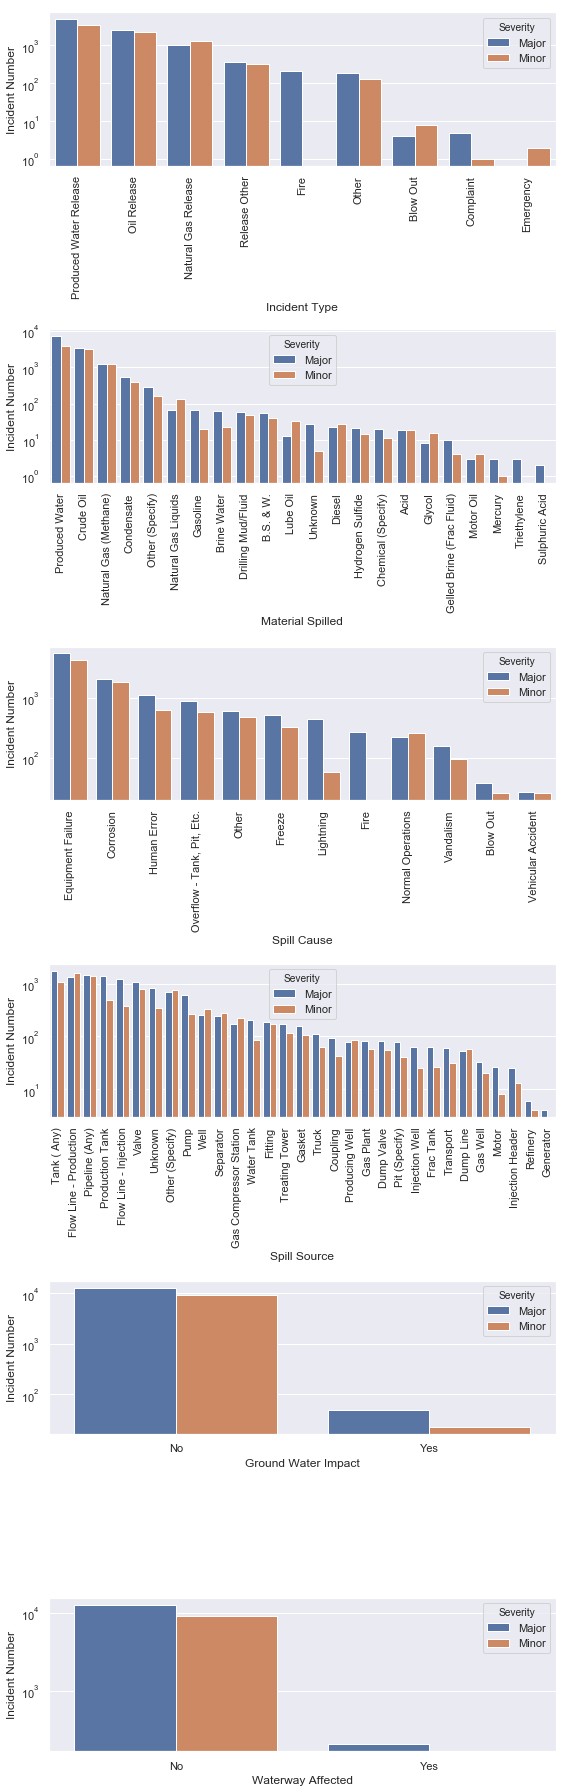

In [9]:
# plot major and minor incidents distribution in incident type, spilled material, spilled cause, spilled source, groud water impact and waterway affected
fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(8, 25))

ax[0] = sns.barplot(x='Incident Type',y='Incident Number', hue='Severity' ,data=incident_type, ax=ax[0])
ax[0].set_yscale('log')
plt.setp(ax[0].get_xticklabels(), rotation=90)

ax[1] = sns.barplot(x='Material Spilled',y='Incident Number', hue='Severity' ,data=spill_material, ax=ax[1])
ax[1].set_yscale('log')
plt.setp(ax[1].get_xticklabels(), rotation=90)

ax[2] = sns.barplot(x='Spill Cause',y='Incident Number',hue='Severity', data=spill_cause, ax=ax[2])
ax[2].set_yscale('log')
plt.setp(ax[2].get_xticklabels(), rotation=90)

ax[3] = sns.barplot(x='Spill Source',y='Incident Number',hue='Severity', data=spill_source, ax=ax[3])
ax[3].set_yscale('log')
plt.setp(ax[3].get_xticklabels(), rotation=90)

ax[4] = sns.barplot(x='Ground Water Impact',y='Incident Number',hue='Severity', data=ground_water_impact, ax=ax[4])
ax[4].set_yscale('log')

ax[5] = sns.barplot(x='Waterway Affected',y='Incident Number',hue='Severity', data=waterway_affected, ax=ax[5])
ax[5].set_yscale('log')
plt.tight_layout()


In [31]:
# calculate the corrolation between ground water impact and waterway affected
ground_water_waterway = spills.loc[:,['Severity','Ground Water Impact','Waterway Affected']]
ground_water_waterway['Ground Water Impact'] = ground_water_waterway['Ground Water Impact'].str.replace('No','0').str.replace('Yes', '1').astype(int)
ground_water_waterway['Waterway Affected'] = ground_water_waterway['Waterway Affected'].str.replace('No','0').str.replace('Yes', '1').astype(int)
np.corrcoef(ground_water_waterway['Ground Water Impact'], ground_water_waterway['Waterway Affected'])[0][1]

0.007220297804624307

The following plots show the number of incidents in each district and counties in that district. The most of major and minor incidents happens in county Lea in Hobbs, Eddy in Artesia, San Juan in Aztec, and 0 (missing county name probably) in Santa Fe. The following counties have major incidents happened only: Eddy in Aztec, county Rio ArribaLea, Socorro, Torrance, Bernalillo, Cibola and Valencia in Santa Fe.

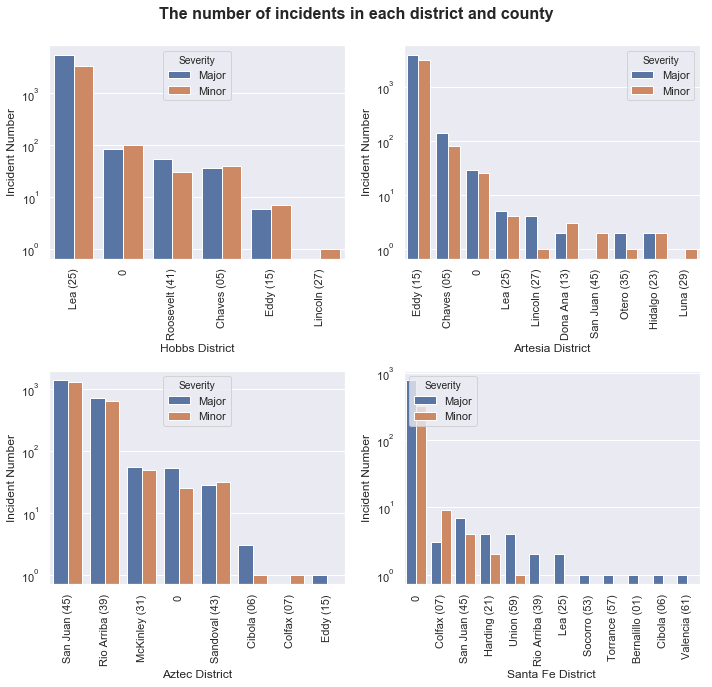

In [44]:
# major and minor incidents happened in each district and county
district_county = spills.groupby(['District','County', 'Severity'])['Incident Number'].count().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 10))

ax[0,0] = sns.barplot(x='County',y='Incident Number', hue='Severity' ,data=district_county[district_county['District']=='Hobbs'], ax=ax[0,0])
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Hobbs District')
plt.setp(ax[0,0].get_xticklabels(), rotation=90)

ax[0,1] = sns.barplot(x='County',y='Incident Number', hue='Severity' ,data=district_county[district_county['District']=='Artesia'], ax=ax[0,1])
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Artesia District')
plt.setp(ax[0,1].get_xticklabels(), rotation=90)

ax[1,0] = sns.barplot(x='County',y='Incident Number', hue='Severity' ,data=district_county[district_county['District']=='Aztec'], ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Aztec District')
plt.setp(ax[1,0].get_xticklabels(), rotation=90)

ax[1,1] = sns.barplot(x='County',y='Incident Number', hue='Severity' ,data=district_county[district_county['District']=='Santa Fe'], ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Santa Fe District')
plt.setp(ax[1,1].get_xticklabels(), rotation=90)

plt.suptitle('The number of incidents in each district and county', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


The following plot indicates a positive linear relationship between the total number of major and minor incidents from each operator. The top 10 operators which have the most major and minor incidents are marked out in the plot. COG OPERATING LLC and EOG Y RESOURCES,INC. are the firt two opertors cause most of incidents in New Mexico.

Text(0.5, 1.0, 'The Total Number of Major and Minor Incidents from Each Operator')

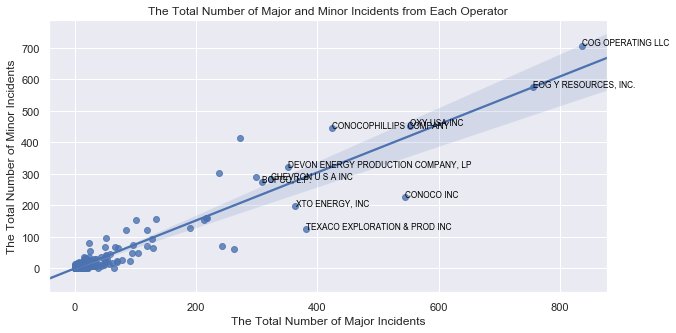

In [48]:
# correlation of major and minor incidents among the operators
operator = pd.DataFrame(spills.groupby('Severity')['Operator Name'].value_counts()).unstack(level=0).reset_index()
operator.columns = ['_'.join(col) for col in operator.columns]
operator.columns = ['Operator Name','Major','Minor']
operator = operator.fillna(0).sort_values('Major', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(10,5))
ax=sns.regplot(operator['Major'],operator['Minor'],data=operator)
for line in range(0,10):               
     ax.text(operator.Major[line]+0.2, operator.Minor[line], operator['Operator Name'][line], horizontalalignment='left', size='small', color='black')#, weight='semibold')
ax.set_xlabel('The Total Number of Major Incidents')
ax.set_ylabel('The Total Number of Minor Incidents')
ax.set_title('The Total Number of Major and Minor Incidents from Each Operator')

## Inferential Statistics

From above data exploratory analysis, that the incidents are caused by various reasons, and there is a positive linearly relationship between major and minor incidents. The major incidents have large spilled volume, and tends to impact waterway and ground water. To further study whether the facility or well has larger probability to cause major incident when an incident occurred, bootstrap and *z* proportion test are applied. 

Assumption: 
+ Null hypothesis: the probability of an incident is a major incident is equal in facilities and wells;
+ Alternative hypothesis: the probability of an incident is a major incident in wells is larger than in facilities.

Assume significance level $alpha$ = 5%. 

In the following bootstrap test, the difference between the number of major incidents and minor incidents in the sample is calculated as `diff`; then conduct the bootstrap test 10000 times, reorganize the `Severity` data, calculate the difference between the number of major incidents and minor incidents each time. The `p` value of the bootstrap difference is large than the sample difference is 0.5% assuming 5% significance.

We reject the null hypothesis that since `p` value is less than 5%, and accept the alternative hypothesis that the probability that an incident is a major incident in wells is larger than in facilities.

In [23]:
# get the facility and well data where severity is not null
facility_well = spills[np.logical_and(np.logical_or(spills['Facility'].notnull(),spills['API'].notnull()),spills['Severity'].notnull())]
# assign major to be 1 and minor to be 0
facility_well.loc[:,'Severity'] = facility_well.loc[:,'Severity'].str.replace('Minor','0').str.replace('Major', '1').astype(int)
# split facility and well 
facility = facility_well[facility_well.loc[:,'Facility'].notnull()]
well = facility_well[facility_well.loc[:,'API'].notnull()]
# bootstrap test of the probability of major happening in facility and well
n_facility = len(facility)
n_well = len(well)
diff = sum(well.Severity) - sum(facility.Severity)
bs_diff = np.empty(10000)
for i in range(10000):
    # reorder the call column
    reorder = np.random.permutation(facility_well.Severity)
    # assume the first half represent white-sounding, and left represents black-sounding, and calculate the difference of calls
    bs_diff[i] = sum(reorder[:n_well]) - sum(reorder[n_well:])
# 95% confidence interval from bootstrap tests, margin of error, and the p value
bs_interval = np.percentile(bs_diff, [2.5, 97.5])
#bs_margin = bs_interval[1] - sum(bs_interval)
pval = np.sum(bs_diff >= diff) / 10000 
bs_interval, pval
#n_facility,n_well

(array([5306., 5496.]), 0.0005)

In the following *z* proportion test, the probabilities of major incidents happen in facility and well are calculated as `pf` and `pw`, and the probability of major incidents of the sample is `p`, and then the standard error, *z* score, and `p` value are calculated. `p` value 0.2% which is less than 5%, so the null hypothesis is rejected and alternative hypothesis is accepted.

In [21]:
# conduct z proportion test of the probability of major happening in facility and well
pf = sum(facility.Severity)/n_facility
pw = sum(well.Severity)/n_well
p = sum(facility_well.Severity) / len(facility_well)
# standard error
se = np.sqrt(p * (1 - p) * (1/n_facility + 1/n_well))
z_score = (pf - pw)/se
z_margin = abs(z_score)
pval = stats.norm.sf(abs(z_score)) * 2
z_margin, pval

(3.6869017503151498, 0.00022700094748614235)

## Conclusion

+ The probability that an incident is a major incident in wells is larger than in facilities.
+ There are more major incidents in the history since 1980s. The monthly number of incidents has increased to around 60/month in 2018.  
+ The volume spilled in minor incidents (below 50 barrels) is much less than the volume spilled in major incidents (up to 100,000 barrels).
+ The correlation between monthly major and minor incidents indicates a positive linearly relationship between major and minor incidents.
+ The top three incident types are produced water release, oil release and natrual gas release which is corresponding to the top three spilled materials; The top three spill causes are equipment failure, corrosion and human error; and the top three spilled sources are tank (any), flow line - production, and pipelne (any). Fire, triethylene and sulphuric acid spill, and generator have 100% probability to cause major incident.
+ The ground water is more likely impacted by major incidents than minor incidents, and the waterway are 100% affected by major incidents. 
+ The most of major and minor incidents happens in county Lea in Hobbs, Eddy in Artesia, San Juan in Aztec, and 0 (missing county name probably) in Santa Fe. 
+ There is a positive linear relationship between the total number of major and minor incidents from each operator. COG OPERATING LLC and EOG Y RESOURCES,INC. are the first two opertors cause most of incidents in New Mexico.